In [12]:
# tut-2  : codeBasics on 'MACHINE LEARNING' 

import pandas as pd                         
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [13]:
df = pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


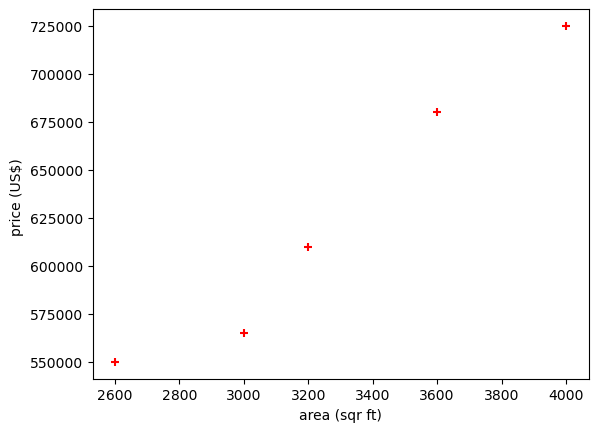

In [49]:
%matplotlib inline                         # plotting the data
plt.xlabel('area (sqr ft)')
plt.ylabel('price (US$) ')
plt.scatter(df.area, df.price, color ='red', marker = '+')

In [50]:
reg = linear_model.LinearRegression()       # linear regression model is now ready
reg.fit( df[['area']], df.price) 

LinearRegression()

In [51]:
reg.predict([[3300]])

C:\Users\AARIN SHEIK M\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [52]:
reg.coef_         # this slope or coefficient of equation : 'y = mx + b' i.e. (m)

array([135.78767123])

In [18]:
reg.intercept_  # this Y-intercept of linear regression  (b)

180616.43835616432

In [19]:
# y = m*x + b                                 #this is how it finds (manual calc)
135.78767123*3300 + 180616.43835616432
                                                

628715.7534151643

In [53]:
reg.predict([[5500]])

C:\Users\AARIN SHEIK M\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([927448.63013699])

In [21]:
135.78767123*5500 + 180616.43835616432

927448.6301211643

In [54]:
df2 = pd.DataFrame({
    'area' : [1000 , 1500 , 2300]
}) 
df2

,area
0,1000
1,1500
2,2300


In [55]:
p = reg.predict(df2)
p

array([316404.10958904, 384297.94520548, 492928.08219178])

In [56]:
df2['prices'] = p
df2

,area,prices
0,1000,316404.109589
1,1500,384297.945205
2,2300,492928.082192


In [59]:
df2.to_csv("predicted_area_price.csv" , index = False)

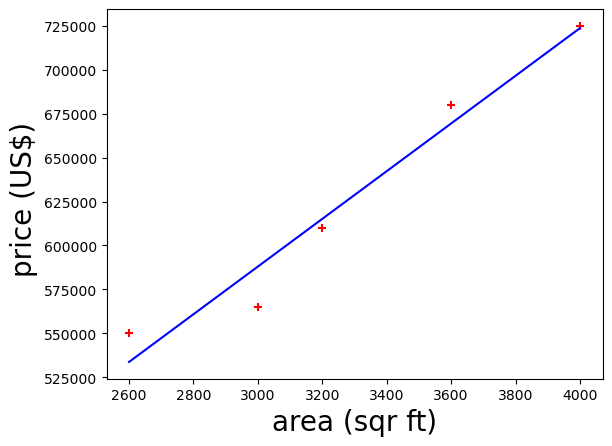

In [60]:
%matplotlib inline                             
plt.xlabel('area (sqr ft)' , fontsize=20)
plt.ylabel('price (US$) ' , fontsize=20)
plt.scatter(df.area, df.price, color ='red', marker = '+')
plt.plot( df.area , reg.predict(df[['area']]) , color='blue' )

# codeBasics : tut-3 


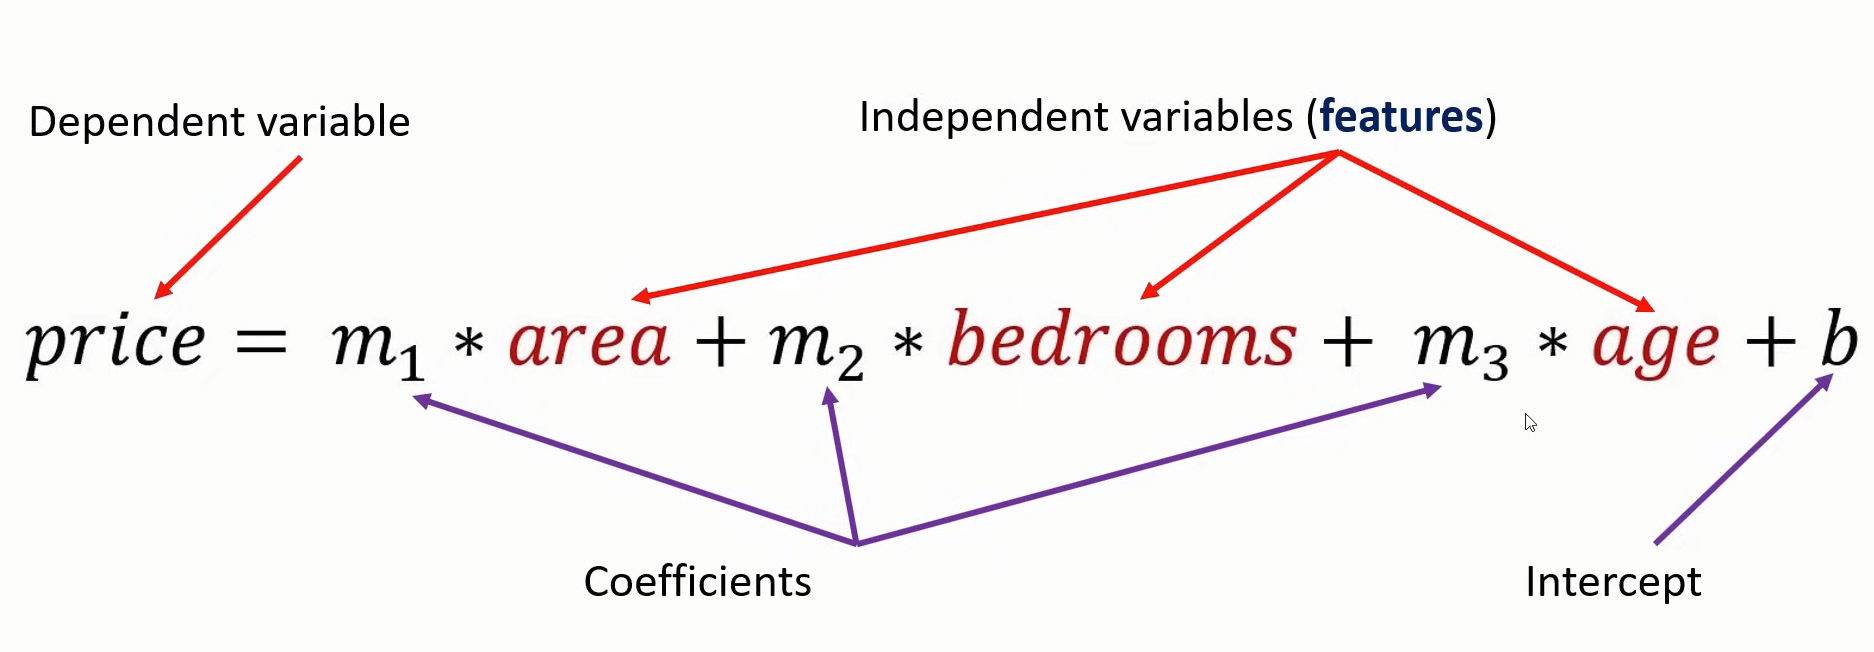

In [61]:
df2 = pd.read_csv("homeprices_2.csv")
df2

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [62]:
import math

med_bed = math.floor(df2.bedrooms.median())
med_bed

4

In [63]:
df2.bedrooms = df2.bedrooms.fillna(med_bed)     # preprocessing or cleaning the data

In [64]:
df2

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [65]:
reg = linear_model.LinearRegression()
reg.fit( df2[['area','bedrooms','age']], df2.price)

LinearRegression()

In [66]:
reg.coef_     # m1 , m2 , m3 are coefficients

array([  112.06244194, 23388.88007794, -3231.71790863])

In [67]:
reg.intercept_    # b

221323.00186540384

In [68]:
reg.predict([[3000,3,40]])

C:\Users\AARIN SHEIK M\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [69]:
112.06244194*3000 + 23388.88007794*3 + (-3231.71790863)*40 + reg.intercept_

498408.25157402386

# Exercise question to predict a salary of a teacher

In [7]:
import pandas as pd
df3 = pd.read_csv("hiring.csv")
df3

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [8]:
df3 = df3.rename(columns={'test_score(out of 10)': 'test_score' , 'interview_score(out of 10)':'interview_score' , 'salary($)':'salary' })
df3

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [10]:
import math
df3.experience = df3.experience.fillna('zero')
df3.test_score = df3.test_score.fillna( math.floor( df3.test_score.median() ) )
df3

,experience,test_score,interview_score,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [11]:
w2n = {
    'zero':0 , 
    'one':1 ,
    'two':2 , 
    'three':3 ,
    'four':4 ,
    'five':5 , 
    'six':6 , 
    'seven':7 ,
    'eight':8 ,
    'nine':9 ,
    'ten':10 ,
    'eleven':11
}

df3['experience'] = df3['experience'].map(w2n)


In [12]:
df3

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [15]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit( df3[['experience','test_score','interview_score']], df3.salary)

LinearRegression()

In [16]:
reg.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [17]:
reg.intercept_

17737.263464337688

In [18]:
reg.predict([[2,9,6]])

C:\Users\AARIN SHEIK M\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [19]:
reg.predict([[12,10,10]])

C:\Users\AARIN SHEIK M\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])

# Tut-5 : CodeBasics

how to save a trained model in a file.

In [20]:
import pickle

In [22]:
with open('hiring_cost_prediction_model','wb') as f :
    pickle.dump( reg , f)

In [23]:
with open('hiring_cost_prediction_model' , 'rb') as f :
    mp = pickle.load(f)

In [24]:
mp.predict([[12,10,10]])

C:\Users\AARIN SHEIK M\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])

In [ ]:
# Another way of saving a model is using 'Joblib' lib (used when your model have large number of numpy arrays)

In [28]:
import joblib

joblib.dump(reg , 'hiring_cost_prediction_model_joblib')

['hiring_cost_prediction_model_joblib']

In [29]:
md = joblib.load('hiring_cost_prediction_model_joblib')
md.predict([[12,10,10]])

C:\Users\AARIN SHEIK M\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])